In [67]:
import pandas as pd
import numpy as np
import os
import requests 
import sys
import json
import datetime 

os.chdir(r'C:\Users\82104\DM\project')

import warnings
warnings.filterwarnings('ignore')

In [68]:
df_estate = pd.read_csv(r'공시지가_2022년.csv', encoding ='UTF8')
df_oil = pd.read_csv(r'서울시 주유소 현황_20220101.csv', encoding ='UTF8')

In [69]:
df_estate

,시도명,시군구명,법정동명,토지코드,공시지가(원/㎡),시군구코드,법정동코드,필지구분코드,필지구분명,본번,부번,기준년도,기준년월,주소
0,서울특별시,성북구,하월곡동,1130000000000000000.0,4837000,11290,13600,1,토지,90,1694,2022,2022-01-01,90-1694
1,서울특별시,성북구,하월곡동,1130000000000000000.0,5544000,11290,13600,1,토지,81,112,2022,2022-01-01,81-112
2,서울특별시,성북구,하월곡동,1130000000000000000.0,3605000,11290,13600,1,토지,81,214,2022,2022-01-01,81-214
3,서울특별시,성북구,하월곡동,1130000000000000000.0,3136000,11290,13600,1,토지,81,125,2022,2022-01-01,81-125
4,서울특별시,성북구,하월곡동,1130000000000000000.0,3245000,11290,13600,1,토지,90,1476,2022,2022-01-01,90-1476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903773,서울특별시,성북구,종암동,1130000000000000000.0,3765000,11290,13500,1,토지,66,16,2022,2022-01-01,66-16
903774,서울특별시,성북구,종암동,1130000000000000000.0,3485000,11290,13500,1,토지,28,266,2022,2022-01-01,28-266
903775,서울특별시,성북구,종암동,1130000000000000000.0,6850000,11290,13500,1,토지,29,12,2022,2022-01-01,29-12
903776,서울특별시,성북구,종암동,1130000000000000000.0,4125000,11290,13500,1,토지,79,317,2022,2022-01-01,79-317


In [70]:
df_estate['부번'] = df_estate['부번'].astype('str') # 부번 dtype이 int라 object로 형변환
df_estate['new_addrs'] = df_estate["본번"].map(str) + "-" + df_estate["부번"] # concat
df_estate

,시도명,시군구명,법정동명,토지코드,공시지가(원/㎡),시군구코드,법정동코드,필지구분코드,필지구분명,본번,부번,기준년도,기준년월,주소,new_addrs
0,서울특별시,성북구,하월곡동,1130000000000000000.0,4837000,11290,13600,1,토지,90,1694,2022,2022-01-01,90-1694,90-1694
1,서울특별시,성북구,하월곡동,1130000000000000000.0,5544000,11290,13600,1,토지,81,112,2022,2022-01-01,81-112,81-112
2,서울특별시,성북구,하월곡동,1130000000000000000.0,3605000,11290,13600,1,토지,81,214,2022,2022-01-01,81-214,81-214
3,서울특별시,성북구,하월곡동,1130000000000000000.0,3136000,11290,13600,1,토지,81,125,2022,2022-01-01,81-125,81-125
4,서울특별시,성북구,하월곡동,1130000000000000000.0,3245000,11290,13600,1,토지,90,1476,2022,2022-01-01,90-1476,90-1476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903773,서울특별시,성북구,종암동,1130000000000000000.0,3765000,11290,13500,1,토지,66,16,2022,2022-01-01,66-16,66-16
903774,서울특별시,성북구,종암동,1130000000000000000.0,3485000,11290,13500,1,토지,28,266,2022,2022-01-01,28-266,28-266
903775,서울특별시,성북구,종암동,1130000000000000000.0,6850000,11290,13500,1,토지,29,12,2022,2022-01-01,29-12,29-12
903776,서울특별시,성북구,종암동,1130000000000000000.0,4125000,11290,13500,1,토지,79,317,2022,2022-01-01,79-317,79-317


In [71]:
### oil data 주소 전처리 후 주유소 별 개별공시지가 세팅하기

In [72]:
addrs = df_oil['주소']

In [73]:
addrs.iloc[55] = '서울특별시 동대문구 서울시립대로 108'
addrs.iloc[138] = '서울특별시 마포구 대흥동 337-32'
addrs.iloc[233] = '서울특별시 영등포구 문래동3가 76-3'
addrs.iloc[240] = '서울특별시 영등포구 양평동5가 37'
addrs.iloc[264] = '서울 관악구 은천동 948-17'
addrs.iloc[298] = '서울특별시 금천구 독산동 292-7'
addrs.iloc[314] = '서울특별시 중랑구 망우동 147-23'
addrs.iloc[342] = '서울특별시 송파구 삼전동 9-23'
addrs.iloc[374] = '서울 서초구 방배동 810-22'
addrs.iloc[378] = '서울 서초구 내곡동 142-3' # row '378' of oil station is anomaly. kako api cannot return this address. we will drop this row later.
addrs.iloc[383] = '서울특별시 서초구 서초1동 1604-21' 

In [74]:
# api받아서 locations에 저장
locations = []
for addr in addrs:
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query={}'.format(addr)
    headers = {"Authorization": "KakaoAK 34261117a1efb76ce8fa2a300220db63"}
    place = requests.get(url, headers = headers).json()['documents']
    locations.append(place)

In [75]:
# 원하는 컬럼 리스트로 담고
# locations에 있는 값 할당
# try 실행 중 인덱싱, 컬럼에러 발생하면 중지 안하고 실행(예외처리)
real_address = []
city = [] 
town = []
bub_code = []
hangjeong_code = []
main_address_no = []
sub_address_no = []
longitude = []
latitude = []

for i in range(len(locations)):
    
    try:
        real_address.append(locations[i][0].get('address').get('address_name'))
        city.append(locations[i][0].get('address').get('region_2depth_name'))
        town.append(locations[i][0].get('address').get('region_3depth_name'))
        bub_code.append(locations[i][0].get('address').get('b_code'))
        hangjeong_code.append(locations[i][0].get('address').get('h_code'))
        main_address_no.append(locations[i][0].get('address').get('main_address_no'))
        sub_address_no.append(locations[i][0].get('address').get('sub_address_no'))
        longitude.append(locations[i][0].get('address').get('x'))
        latitude.append(locations[i][0].get('address').get('y'))

    except IndexError:
        print(i,'번째 주소 못가져옴', end ='')
        print()
        real_address.append('없음')
        city.append('없음')
        town.append('없음')
        bub_code.append('없음')
        hangjeong_code.append('없음')
        main_address_no.append('없음')
        sub_address_no.append('없음')
        longitude.append('없음')
        latitude.append('없음')
        
    except AttributeError:
        real_address.append(locations[i][0].get('road_address').get('address_name'))
        city.append(locations[i][0].get('road_address').get('region_2depth_name'))
        town.append(locations[i][0].get('road_address').get('region_3depth_name'))
        bub_code.append(locations[i][0].get('road_address').get('b_code'))
        hangjeong_code.append(locations[i][0].get('road_address').get('h_code'))
        main_address_no.append(locations[i][0].get('road_address').get('main_address_no'))
        sub_address_no.append(locations[i][0].get('road_address').get('sub_address_no'))
        longitude.append(locations[i][0].get('road_address').get('x'))
        latitude.append(locations[i][0].get('road_address').get('y'))

378 번째 주소 못가져옴


Although we preprocessed 378th row, but could not get api solutions.

In [76]:
# 주유소데이터 도로명 -> 지번주소로,
# 개별공시지가 지번주소와 맞게
# 합쳐서 주유소 주소를 one key로 둘거임
tmp3 = np.array([real_address, city, town, bub_code, hangjeong_code, main_address_no, sub_address_no,
                latitude,longitude]).T
tmp3

array([['서울 용산구 후암동 448-103', '용산구', '후암동', ..., '103',
        '37.5544085670544', '126.977734582566'],
       ['서울 용산구 동자동 14-125', '용산구', '동자동', ..., '125',
        '37.5502005044121', '126.972417738531'],
       ['서울 용산구 갈월동 11-34', '용산구', '갈월동', ..., '34', '37.5470289447515',
        '126.972228457829'],
       ...,
       ['서울 도봉구 도봉동 601-55', '도봉구', '도봉동', ..., '55', '37.6744735831616',
        '127.044066665278'],
       ['서울 도봉구 도봉동 629', '도봉구', '도봉동', ..., '', '37.679014779402',
        '127.049750654086'],
       ['서울 도봉구 방학동 724-5', '도봉구', '방학동', ..., '5', '37.6622801187124',
        '127.047441496273']], dtype='<U21')

In [77]:
df_temp = pd.DataFrame(tmp3, columns = ['지번주소','구', '동', '법정코드','행정코드',
                                       '지번주번지', '지번부번지', '위도','경도'])
df_temp

,지번주소,구,동,법정코드,행정코드,지번주번지,지번부번지,위도,경도
0,서울 용산구 후암동 448-103,용산구,후암동,1117010100,1117051000,448,103,37.5544085670544,126.977734582566
1,서울 용산구 동자동 14-125,용산구,동자동,1117010700,1117053000,14,125,37.5502005044121,126.972417738531
2,서울 용산구 갈월동 11-34,용산구,갈월동,1117010400,1117053000,11,34,37.5470289447515,126.972228457829
3,서울 용산구 서계동 47-15,용산구,서계동,1117010800,1117055500,47,15,37.5523662854224,126.968993700509
4,서울 용산구 원효로2가 70-2,용산구,원효로2가,1117011300,1117056000,70,2,37.5355890312127,126.962708973419
...,...,...,...,...,...,...,...,...,...
468,서울 도봉구 도봉동 298-2,도봉구,도봉동,1132010800,1132052100,298,2,37.6883740291887,127.045327229383
469,서울 도봉구 도봉동 561-6,도봉구,도봉동,1132010800,1132052100,561,6,37.6843693792253,127.045522281038
470,서울 도봉구 도봉동 601-55,도봉구,도봉동,1132010800,1132052100,601,55,37.6744735831616,127.044066665278
471,서울 도봉구 도봉동 629,도봉구,도봉동,1132010800,1132052200,629,,37.679014779402,127.049750654086


In [78]:
df_temp.loc[df_temp['지번부번지'] == '', '지번부번지'] = 0
df_temp

,지번주소,구,동,법정코드,행정코드,지번주번지,지번부번지,위도,경도
0,서울 용산구 후암동 448-103,용산구,후암동,1117010100,1117051000,448,103,37.5544085670544,126.977734582566
1,서울 용산구 동자동 14-125,용산구,동자동,1117010700,1117053000,14,125,37.5502005044121,126.972417738531
2,서울 용산구 갈월동 11-34,용산구,갈월동,1117010400,1117053000,11,34,37.5470289447515,126.972228457829
3,서울 용산구 서계동 47-15,용산구,서계동,1117010800,1117055500,47,15,37.5523662854224,126.968993700509
4,서울 용산구 원효로2가 70-2,용산구,원효로2가,1117011300,1117056000,70,2,37.5355890312127,126.962708973419
...,...,...,...,...,...,...,...,...,...
468,서울 도봉구 도봉동 298-2,도봉구,도봉동,1132010800,1132052100,298,2,37.6883740291887,127.045327229383
469,서울 도봉구 도봉동 561-6,도봉구,도봉동,1132010800,1132052100,561,6,37.6843693792253,127.045522281038
470,서울 도봉구 도봉동 601-55,도봉구,도봉동,1132010800,1132052100,601,55,37.6744735831616,127.044066665278
471,서울 도봉구 도봉동 629,도봉구,도봉동,1132010800,1132052200,629,0,37.679014779402,127.049750654086


In [79]:
df_temp['지번주번지'] = df_temp['지번주번지'].astype('str')
df_temp['지번부번지'] = df_temp['지번부번지'].astype('str')
df_temp['address'] = df_temp[['지번주번지', '지번부번지']].apply('-'.join, axis=1)

df_temp

,지번주소,구,동,법정코드,행정코드,지번주번지,지번부번지,위도,경도,address
0,서울 용산구 후암동 448-103,용산구,후암동,1117010100,1117051000,448,103,37.5544085670544,126.977734582566,448-103
1,서울 용산구 동자동 14-125,용산구,동자동,1117010700,1117053000,14,125,37.5502005044121,126.972417738531,14-125
2,서울 용산구 갈월동 11-34,용산구,갈월동,1117010400,1117053000,11,34,37.5470289447515,126.972228457829,11-34
3,서울 용산구 서계동 47-15,용산구,서계동,1117010800,1117055500,47,15,37.5523662854224,126.968993700509,47-15
4,서울 용산구 원효로2가 70-2,용산구,원효로2가,1117011300,1117056000,70,2,37.5355890312127,126.962708973419,70-2
...,...,...,...,...,...,...,...,...,...,...
468,서울 도봉구 도봉동 298-2,도봉구,도봉동,1132010800,1132052100,298,2,37.6883740291887,127.045327229383,298-2
469,서울 도봉구 도봉동 561-6,도봉구,도봉동,1132010800,1132052100,561,6,37.6843693792253,127.045522281038,561-6
470,서울 도봉구 도봉동 601-55,도봉구,도봉동,1132010800,1132052100,601,55,37.6744735831616,127.044066665278,601-55
471,서울 도봉구 도봉동 629,도봉구,도봉동,1132010800,1132052200,629,0,37.679014779402,127.049750654086,629-0


In [80]:
df_oil.head()

,연번,자치구명,주유소명,주소
0,1,용산구,현대오일뱅크(주) 직영소월길주유소,서울특별시 용산구 소월로66
1,2,용산구,선익상사(주) 동자동주유소,서울특별시 용산구 한강대로 104길 6
2,3,용산구,현대오일뱅크㈜ 직영갈월동주유소,서울특별시 용산구 한강대로 322
3,4,용산구,서계주유소,서울특별시 용산구 청파로 367
4,5,용산구,㈜영원에너지 풍기주유소,서울특별시 용산구 원효로178


In [81]:
df_oil = pd.concat([df_oil, df_temp], axis =1)
df_oil

,연번,자치구명,주유소명,주소,지번주소,구,동,법정코드,행정코드,지번주번지,지번부번지,위도,경도,address
0,1,용산구,현대오일뱅크(주) 직영소월길주유소,서울특별시 용산구 소월로66,서울 용산구 후암동 448-103,용산구,후암동,1117010100,1117051000,448,103,37.5544085670544,126.977734582566,448-103
1,2,용산구,선익상사(주) 동자동주유소,서울특별시 용산구 한강대로 104길 6,서울 용산구 동자동 14-125,용산구,동자동,1117010700,1117053000,14,125,37.5502005044121,126.972417738531,14-125
2,3,용산구,현대오일뱅크㈜ 직영갈월동주유소,서울특별시 용산구 한강대로 322,서울 용산구 갈월동 11-34,용산구,갈월동,1117010400,1117053000,11,34,37.5470289447515,126.972228457829,11-34
3,4,용산구,서계주유소,서울특별시 용산구 청파로 367,서울 용산구 서계동 47-15,용산구,서계동,1117010800,1117055500,47,15,37.5523662854224,126.968993700509,47-15
4,5,용산구,㈜영원에너지 풍기주유소,서울특별시 용산구 원효로178,서울 용산구 원효로2가 70-2,용산구,원효로2가,1117011300,1117056000,70,2,37.5355890312127,126.962708973419,70-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,469,도봉구,현대오일뱅크㈜직영 도봉현대셀프주유소,서울특별시 도봉구 도봉로 941 (도봉동),서울 도봉구 도봉동 298-2,도봉구,도봉동,1132010800,1132052100,298,2,37.6883740291887,127.045327229383,298-2
469,470,도봉구,GS칼텍스㈜ 도봉주유소,서울특별시 도봉구 도봉로 895 (도봉동),서울 도봉구 도봉동 561-6,도봉구,도봉동,1132010800,1132052100,561,6,37.6843693792253,127.045522281038,561-6
470,471,도봉구,(주)송만에너지 도봉제일주유소,서울특별시 도봉구 도봉로 783 (도봉동),서울 도봉구 도봉동 601-55,도봉구,도봉동,1132010800,1132052100,601,55,37.6744735831616,127.044066665278,601-55
471,472,도봉구,노원교주유소,서울특별시 도봉구 마들로 776 (도봉동),서울 도봉구 도봉동 629,도봉구,도봉동,1132010800,1132052200,629,0,37.679014779402,127.049750654086,629-0


In [82]:
drop_list3 = ['연번', '자치구명', '주소', '행정코드', '지번주번지','지번부번지']
for i in drop_list3:
    df_oil = df_oil.drop(i, axis = 1)
df_oil

,주유소명,지번주소,구,동,법정코드,위도,경도,address
0,현대오일뱅크(주) 직영소월길주유소,서울 용산구 후암동 448-103,용산구,후암동,1117010100,37.5544085670544,126.977734582566,448-103
1,선익상사(주) 동자동주유소,서울 용산구 동자동 14-125,용산구,동자동,1117010700,37.5502005044121,126.972417738531,14-125
2,현대오일뱅크㈜ 직영갈월동주유소,서울 용산구 갈월동 11-34,용산구,갈월동,1117010400,37.5470289447515,126.972228457829,11-34
3,서계주유소,서울 용산구 서계동 47-15,용산구,서계동,1117010800,37.5523662854224,126.968993700509,47-15
4,㈜영원에너지 풍기주유소,서울 용산구 원효로2가 70-2,용산구,원효로2가,1117011300,37.5355890312127,126.962708973419,70-2
...,...,...,...,...,...,...,...,...
468,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉동 298-2,도봉구,도봉동,1132010800,37.6883740291887,127.045327229383,298-2
469,GS칼텍스㈜ 도봉주유소,서울 도봉구 도봉동 561-6,도봉구,도봉동,1132010800,37.6843693792253,127.045522281038,561-6
470,(주)송만에너지 도봉제일주유소,서울 도봉구 도봉동 601-55,도봉구,도봉동,1132010800,37.6744735831616,127.044066665278,601-55
471,노원교주유소,서울 도봉구 도봉동 629,도봉구,도봉동,1132010800,37.679014779402,127.049750654086,629-0


In [91]:
df_table = pd.merge(left=df_oil, right=df_estate, how='left', left_on=['address','동'], right_on=['new_addrs','법정동명'])
df_table

,주유소명,지번주소,구,동,법정코드,위도,경도,address,시도명,시군구명,...,시군구코드,법정동코드,필지구분코드,필지구분명,본번,부번,기준년도,기준년월,주소,new_addrs
0,현대오일뱅크(주) 직영소월길주유소,서울 용산구 후암동 448-103,용산구,후암동,1117010100,37.5544085670544,126.977734582566,448-103,서울특별시,용산구,...,11170.0,10100.0,1.0,토지,448,103,2022.0,2022-01-01,448-103,448-103
1,선익상사(주) 동자동주유소,서울 용산구 동자동 14-125,용산구,동자동,1117010700,37.5502005044121,126.972417738531,14-125,서울특별시,용산구,...,11170.0,10700.0,1.0,토지,14,125,2022.0,2022-01-01,14-125,14-125
2,현대오일뱅크㈜ 직영갈월동주유소,서울 용산구 갈월동 11-34,용산구,갈월동,1117010400,37.5470289447515,126.972228457829,11-34,서울특별시,용산구,...,11170.0,10400.0,1.0,토지,11,34,2022.0,2022-01-01,11-34,11-34
3,서계주유소,서울 용산구 서계동 47-15,용산구,서계동,1117010800,37.5523662854224,126.968993700509,47-15,서울특별시,용산구,...,11170.0,10800.0,1.0,토지,47,15,2022.0,2022-01-01,47-15,47-15
4,㈜영원에너지 풍기주유소,서울 용산구 원효로2가 70-2,용산구,원효로2가,1117011300,37.5355890312127,126.962708973419,70-2,서울특별시,용산구,...,11170.0,11300.0,1.0,토지,70,2,2022.0,2022-01-01,70-2,70-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉동 298-2,도봉구,도봉동,1132010800,37.6883740291887,127.045327229383,298-2,서울특별시,도봉구,...,11320.0,10800.0,1.0,토지,298,2,2022.0,2022-01-01,298-2,298-2
471,GS칼텍스㈜ 도봉주유소,서울 도봉구 도봉동 561-6,도봉구,도봉동,1132010800,37.6843693792253,127.045522281038,561-6,서울특별시,도봉구,...,11320.0,10800.0,1.0,토지,561,6,2022.0,2022-01-01,561-6,561-6
472,(주)송만에너지 도봉제일주유소,서울 도봉구 도봉동 601-55,도봉구,도봉동,1132010800,37.6744735831616,127.044066665278,601-55,서울특별시,도봉구,...,11320.0,10800.0,1.0,토지,601,55,2022.0,2022-01-01,601-55,601-55
473,노원교주유소,서울 도봉구 도봉동 629,도봉구,도봉동,1132010800,37.679014779402,127.049750654086,629-0,서울특별시,도봉구,...,11320.0,10800.0,1.0,토지,629,0,2022.0,2022-01-01,6290,629-0


In [92]:
drop_list4 = ['지번주소', '구', '동', '법정코드', '시도명','토지코드','시군구코드','법정동코드', '필지구분코드', 
             '필지구분명', '본번', '부번', '기준년도', '기준년월', 'address', 'new_addrs']
for i in drop_list4:
    df_table = df_table.drop(i, axis = 1)
df_table

,주유소명,위도,경도,시군구명,법정동명,공시지가(원/㎡),주소
0,현대오일뱅크(주) 직영소월길주유소,37.5544085670544,126.977734582566,용산구,후암동,8280000.0,448-103
1,선익상사(주) 동자동주유소,37.5502005044121,126.972417738531,용산구,동자동,18850000.0,14-125
2,현대오일뱅크㈜ 직영갈월동주유소,37.5470289447515,126.972228457829,용산구,갈월동,15050000.0,11-34
3,서계주유소,37.5523662854224,126.968993700509,용산구,서계동,10330000.0,47-15
4,㈜영원에너지 풍기주유소,37.5355890312127,126.962708973419,용산구,원효로2가,13300000.0,70-2
...,...,...,...,...,...,...,...
470,현대오일뱅크㈜직영 도봉현대셀프주유소,37.6883740291887,127.045327229383,도봉구,도봉동,4205000.0,298-2
471,GS칼텍스㈜ 도봉주유소,37.6843693792253,127.045522281038,도봉구,도봉동,4395000.0,561-6
472,(주)송만에너지 도봉제일주유소,37.6744735831616,127.044066665278,도봉구,도봉동,5671000.0,601-55
473,노원교주유소,37.679014779402,127.049750654086,도봉구,도봉동,5380000.0,6290


In [93]:
df_table = df_table[['주유소명', '위도', '경도', '시군구명', '법정동명', '공시지가(원/㎡)', '주소']]

In [94]:
df_table[df_table['법정동명'].isnull()]

,주유소명,위도,경도,시군구명,법정동명,공시지가(원/㎡),주소
178,㈜유턴상사유턴주유소,37.5572480682887,126.810028716951,NaN,NaN,NaN,NaN
380,지에스칼텍스(주)내곡주유소,없음,없음,NaN,NaN,NaN,NaN
452,㈜중앙에너비스 수서지점,37.4840308926021,127.094990086002,NaN,NaN,NaN,NaN


Due to the limitation of kakao api, the 3 rows could not be combined. => drop them

In [95]:
df_table = df_table.drop(df_table[df_table['법정동명'].isnull()].index, axis=0).reset_index(drop=True)

In [96]:
df_table = df_table.rename(columns = {'주유소명' : 'Gas_station', '위도' : 'Latitude', '경도' : 'Longitude', '시군구명' : 'District', '법정동명' : 'dong', '공시지가(원/㎡)' : 'estate', '주소' : 'address'})

In [97]:
df_table.columns = df_table.columns.str.upper()

In [98]:
df_table

,GAS_STATION,LATITUDE,LONGITUDE,DISTRICT,DONG,ESTATE,ADDRESS
0,현대오일뱅크(주) 직영소월길주유소,37.5544085670544,126.977734582566,용산구,후암동,8280000.0,448-103
1,선익상사(주) 동자동주유소,37.5502005044121,126.972417738531,용산구,동자동,18850000.0,14-125
2,현대오일뱅크㈜ 직영갈월동주유소,37.5470289447515,126.972228457829,용산구,갈월동,15050000.0,11-34
3,서계주유소,37.5523662854224,126.968993700509,용산구,서계동,10330000.0,47-15
4,㈜영원에너지 풍기주유소,37.5355890312127,126.962708973419,용산구,원효로2가,13300000.0,70-2
...,...,...,...,...,...,...,...
467,현대오일뱅크㈜직영 도봉현대셀프주유소,37.6883740291887,127.045327229383,도봉구,도봉동,4205000.0,298-2
468,GS칼텍스㈜ 도봉주유소,37.6843693792253,127.045522281038,도봉구,도봉동,4395000.0,561-6
469,(주)송만에너지 도봉제일주유소,37.6744735831616,127.044066665278,도봉구,도봉동,5671000.0,601-55
470,노원교주유소,37.679014779402,127.049750654086,도봉구,도봉동,5380000.0,6290


In [99]:
# df_table.to_csv(r'data_oil.csv', index=False)

In [197]:
df_gas = df_table.copy()

In [198]:
df_gas[['LATITUDE', 'LONGITUDE']] = df_oil[['LATITUDE', 'LONGITUDE']].astype(float)

In [199]:
df_DC = pd.read_csv(r'물류터미널정보_221001.csv',encoding ='UTF8')

In [200]:
df_gas

,GAS_STATION,LATITUDE,LONGITUDE,DISTRICT,DONG,ESTATE,ADDRESS
0,현대오일뱅크(주) 직영소월길주유소,37.554409,126.977735,용산구,후암동,8280000.0,448-103
1,선익상사(주) 동자동주유소,37.550201,126.972418,용산구,동자동,18850000.0,14-125
2,현대오일뱅크㈜ 직영갈월동주유소,37.547029,126.972228,용산구,갈월동,15050000.0,11-34
3,서계주유소,37.552366,126.968994,용산구,서계동,10330000.0,47-15
4,㈜영원에너지 풍기주유소,37.535589,126.962709,용산구,원효로2가,13300000.0,70-2
...,...,...,...,...,...,...,...
467,현대오일뱅크㈜직영 도봉현대셀프주유소,37.688374,127.045327,도봉구,도봉동,4205000.0,298-2
468,GS칼텍스㈜ 도봉주유소,37.684369,127.045522,도봉구,도봉동,4395000.0,561-6
469,(주)송만에너지 도봉제일주유소,37.674474,127.044067,도봉구,도봉동,5671000.0,601-55
470,노원교주유소,37.679015,127.049751,도봉구,도봉동,5380000.0,6290


In [201]:
from haversine import haversine
from tqdm import notebook

distance_compare_list = [] # distance value 담을 리스트
for i in notebook.tqdm(range(df_DC.shape[0])):
    for j in range(df_gas.shape[0]):
        DC = (df_DC.Latitude[i], df_DC.Longitude[i]) 
        oil = (df_gas.LATITUDE[j], df_gas.LONGITUDE[j]) 
        result = haversine(DC, oil, unit='km')
        distance_compare_list.append(result)


# create distance df
distance = pd.DataFrame(data = distance_compare_list)
distance

  0%|          | 0/3 [00:00<?, ?it/s]

,0
0,8.970251
1,9.568763
2,9.713120
3,9.772973
4,11.006969
...,...
1411,25.294460
1412,24.849744
1413,23.746627
1414,24.267332


In [202]:
dist_eastDC = distance[:472].to_numpy() # 동부터미널까지 거리들
dist_westDC = distance[472:944].to_numpy() # 서부터미널까지 거리들
dist_koreaDC = distance[944:].to_numpy() # 한국터미널까지 거리들

In [203]:
df_gas['DIST_EASTDC'] = dist_eastDC
df_gas['DIST_WESTDC'] = dist_westDC
df_gas['DIST_KOREADC'] = dist_koreaDC

In [204]:
df_gas.head(3)

,GAS_STATION,LATITUDE,LONGITUDE,DISTRICT,DONG,ESTATE,ADDRESS,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC
0,현대오일뱅크(주) 직영소월길주유소,37.554409,126.977735,용산구,후암동,8280000.0,448-103,8.970251,13.202286,11.678968
1,선익상사(주) 동자동주유소,37.550201,126.972418,용산구,동자동,18850000.0,14-125,9.568763,12.593357,11.494239
2,현대오일뱅크㈜ 직영갈월동주유소,37.547029,126.972228,용산구,갈월동,15050000.0,11-34,9.713120,12.454393,11.199948


In [205]:
# 주유소 면적 => 나연님 전처리 데이터 후 Excel로 중복값 & Null 값 채움. => 사라진 주유소도 있어서 삭제해버림.
df_area = pd.read_excel('주유소 면적.xlsx')
df_area

,GAS_STATION,population,school,apart,market,LATITUDE,LONGITUDE,DISTRICT,DONG,wkt_geom,UFID,NAME,KIND,AREA,BASE_DATE,ADM_DR_CD,ADM_DR_NM,NAME_2
0,현대오일뱅크(주) 직영소월길주유소,166,5,1,58,37.554409,126.977735,용산구,후암동,MultiPolygon (((126.97694474052541125 37.55358...,TRN0600000002QAO3,SK에너지소월길주유소,GSK001,245.0,20210630.0,1103051.0,후암동,용산구
1,선익상사(주) 동자동주유소,349,9,2,6,37.550201,126.972418,용산구,동자동,MultiPolygon (((126.97130965709310146 37.54995...,TRN0600000002QAJY,SK에너지동자동주유소,GSK001,711.0,20210630.0,1103053.0,남영동,용산구
2,현대오일뱅크㈜ 직영갈월동주유소,251,9,1,22,37.547029,126.972228,용산구,갈월동,MultiPolygon (((126.97133512071627592 37.54635...,TRN0600000002QBL1,SK네트웍스직영갈월동주유소,GSK001,700.0,20210630.0,1103053.0,남영동,용산구
3,서계주유소,102,5,2,4,37.552366,126.968994,용산구,서계동,MultiPolygon (((126.96790067781765288 37.55174...,TRN0600000002QAM1,GS칼텍스서계주유소,GSK001,1010.0,20210630.0,1103071.0,청파동,용산구
4,㈜영원에너지 풍기주유소,186,9,6,20,37.535589,126.962709,용산구,원효로2가,MultiPolygon (((126.96235679690941822 37.53549...,TRN0600000002QBN3,GS칼텍스풍기주유소,GSK001,519.0,20210630.0,1103072.0,원효로1동,용산구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,현대오일뱅크㈜직영 도봉현대셀프주유소,16,4,1,0,37.688374,127.045327,도봉구,도봉동,MultiPolygon (((127.04518659989290086 37.68816...,TRN0600000002PJZM,SK에너지도담주유소,GSK001,1366.0,20210630.0,1110064.0,도봉1동,도봉구
465,GS칼텍스㈜ 도봉주유소,180,4,1,0,37.684369,127.045522,도봉구,도봉동,MultiPolygon (((127.04521411792508445 37.68366...,NaN,NaN,NaN,1640.7,NaN,NaN,NaN,NaN
466,(주)송만에너지 도봉제일주유소,465,0,0,4,37.674474,127.044067,도봉구,도봉동,MultiPolygon (((127.04300674510970737 37.67373...,TRN0600000002PKUI,현대오일뱅크도봉제일주유소,GSK001,271.0,20210630.0,1110064.0,도봉1동,도봉구
467,노원교주유소,55,3,1,2,37.679015,127.049751,도봉구,도봉동,MultiPolygon (((127.04864917541478064 37.67826...,TRN0600000002PJXK,현대오일뱅크해와달주유소,GSK001,815.0,20210630.0,1110065.0,도봉2동,도봉구


In [206]:
df_area = df_area[['GAS_STATION', 'population', 'school', 'apart', 'market', 'LATITUDE', 'LONGITUDE', 'DISTRICT', 'DONG', 'AREA']]

In [207]:
df_gas = df_gas[['GAS_STATION', 'LATITUDE', 'LONGITUDE', 'DISTRICT', 'ESTATE', 'ADDRESS', 'DIST_EASTDC', 'DIST_WESTDC', 'DIST_KOREADC']]

In [208]:
df_gas.drop_duplicates(subset=['GAS_STATION', 'LATITUDE', 'LONGITUDE', 'DISTRICT'], keep='first', inplace=True, ignore_index=True)

In [209]:
df_gas

,GAS_STATION,LATITUDE,LONGITUDE,DISTRICT,ESTATE,ADDRESS,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC
0,현대오일뱅크(주) 직영소월길주유소,37.554409,126.977735,용산구,8280000.0,448-103,8.970251,13.202286,11.678968
1,선익상사(주) 동자동주유소,37.550201,126.972418,용산구,18850000.0,14-125,9.568763,12.593357,11.494239
2,현대오일뱅크㈜ 직영갈월동주유소,37.547029,126.972228,용산구,15050000.0,11-34,9.713120,12.454393,11.199948
3,서계주유소,37.552366,126.968994,용산구,10330000.0,47-15,9.772973,12.403577,11.855362
4,㈜영원에너지 풍기주유소,37.535589,126.962709,용산구,13300000.0,70-2,11.006969,11.272070,10.639303
...,...,...,...,...,...,...,...,...,...
465,현대오일뱅크㈜직영 도봉현대셀프주유소,37.688374,127.045327,도봉구,4205000.0,298-2,12.288585,26.954691,25.294460
466,GS칼텍스㈜ 도봉주유소,37.684369,127.045522,도봉구,4395000.0,561-6,11.849594,26.639204,24.849744
467,(주)송만에너지 도봉제일주유소,37.674474,127.044067,도봉구,5671000.0,601-55,10.807711,25.756175,23.746627
468,노원교주유소,37.679015,127.049751,도봉구,5380000.0,6290,11.191130,26.466958,24.267332


In [210]:
df_data = pd.merge(df_area, df_gas, on=['GAS_STATION', 'LATITUDE', 'LONGITUDE', 'DISTRICT'], how='left')
df_data

,GAS_STATION,population,school,apart,market,LATITUDE,LONGITUDE,DISTRICT,DONG,AREA,ESTATE,ADDRESS,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC
0,현대오일뱅크(주) 직영소월길주유소,166,5,1,58,37.554409,126.977735,용산구,후암동,245.0,8280000.0,448-103,8.970251,13.202286,11.678968
1,선익상사(주) 동자동주유소,349,9,2,6,37.550201,126.972418,용산구,동자동,711.0,18850000.0,14-125,9.568763,12.593357,11.494239
2,현대오일뱅크㈜ 직영갈월동주유소,251,9,1,22,37.547029,126.972228,용산구,갈월동,700.0,15050000.0,11-34,9.713120,12.454393,11.199948
3,서계주유소,102,5,2,4,37.552366,126.968994,용산구,서계동,1010.0,10330000.0,47-15,9.772973,12.403577,11.855362
4,㈜영원에너지 풍기주유소,186,9,6,20,37.535589,126.962709,용산구,원효로2가,519.0,13300000.0,70-2,11.006969,11.272070,10.639303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,현대오일뱅크㈜직영 도봉현대셀프주유소,16,4,1,0,37.688374,127.045327,도봉구,도봉동,1366.0,4205000.0,298-2,12.288585,26.954691,25.294460
465,GS칼텍스㈜ 도봉주유소,180,4,1,0,37.684369,127.045522,도봉구,도봉동,1640.7,4395000.0,561-6,11.849594,26.639204,24.849744
466,(주)송만에너지 도봉제일주유소,465,0,0,4,37.674474,127.044067,도봉구,도봉동,271.0,5671000.0,601-55,10.807711,25.756175,23.746627
467,노원교주유소,55,3,1,2,37.679015,127.049751,도봉구,도봉동,815.0,5380000.0,6290,11.191130,26.466958,24.267332


In [211]:
df_pop500 = pd.read_excel('주유소 500m 반경 안 인구수 최종 파일.xlsx')

In [212]:
df_pop500 = df_pop500.drop_duplicates()

In [213]:
df_pop1000 = pd.read_excel('주유소 1000m 반경 안 인구수 최종 파일.xlsx')

In [214]:
df_pop1000 = df_pop1000.drop_duplicates()

In [215]:
df_pop500 = df_pop500[['GAS_STATION', 'DISTRICT', 'DONG', 'population']]
df_pop1000 = df_pop1000[['GAS_STATION', 'DISTRICT', 'DONG', 'population']]

In [216]:
df_example = pd.merge(df_data, df_pop500, on=['GAS_STATION', 'DISTRICT', 'DONG'], how='left')
df_example = pd.merge(df_example, df_pop1000, on=['GAS_STATION', 'DISTRICT', 'DONG'], how='left')

In [219]:
df_example.rename(columns={'population_x' : 'pop100', 'population_y' : 'pop500', 'population' : 'pop1000'}, inplace=True)

In [222]:
df_example = df_example[['GAS_STATION', 'DISTRICT', 'DONG', 'LATITUDE', 'LONGITUDE', 'AREA', 'ESTATE', 'DIST_EASTDC', 'DIST_WESTDC', 'DIST_KOREADC', 'pop100', 'pop500', 'pop1000', 'school', 'apart', 'market']]

In [224]:
df_example.columns = df_example.columns.str.upper()

In [225]:
df_example

,GAS_STATION,DISTRICT,DONG,LATITUDE,LONGITUDE,AREA,ESTATE,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC,POP100,POP500,POP1000,SCHOOL,APART,MARKET
0,현대오일뱅크(주) 직영소월길주유소,용산구,후암동,37.554409,126.977735,245.0,8280000.0,8.970251,13.202286,11.678968,166,4465,15660,5,1,58
1,선익상사(주) 동자동주유소,용산구,동자동,37.550201,126.972418,711.0,18850000.0,9.568763,12.593357,11.494239,349,7404,25467,9,2,6
2,현대오일뱅크㈜ 직영갈월동주유소,용산구,갈월동,37.547029,126.972228,700.0,15050000.0,9.713120,12.454393,11.199948,251,7069,26924,9,1,22
3,서계주유소,용산구,서계동,37.552366,126.968994,1010.0,10330000.0,9.772973,12.403577,11.855362,102,8374,30288,5,2,4
4,㈜영원에너지 풍기주유소,용산구,원효로2가,37.535589,126.962709,519.0,13300000.0,11.006969,11.272070,10.639303,186,5401,27394,9,6,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,현대오일뱅크㈜직영 도봉현대셀프주유소,도봉구,도봉동,37.688374,127.045327,1366.0,4205000.0,12.288585,26.954691,25.294460,16,4651,12421,4,1,0
465,GS칼텍스㈜ 도봉주유소,도봉구,도봉동,37.684369,127.045522,1640.7,4395000.0,11.849594,26.639204,24.849744,180,9341,18592,4,1,0
466,(주)송만에너지 도봉제일주유소,도봉구,도봉동,37.674474,127.044067,271.0,5671000.0,10.807711,25.756175,23.746627,465,7251,28101,0,0,4
467,노원교주유소,도봉구,도봉동,37.679015,127.049751,815.0,5380000.0,11.191130,26.466958,24.267332,55,9057,30149,3,1,2


In [227]:
df_example.to_csv('data_for_classification.csv')

In [42]:
values = df_example.iloc[:,1:]

In [45]:
values = values.values

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_ = MinMaxScaler()
scaler_.fit(values)
scaled_ = scaler_.transform(values)

scaled__df = pd.DataFrame(scaled_, columns=df_example.columns[1:])

print(scaled__df)
print(f"최소\n{scaled__df.min()}")
print(f"최대\n{scaled__df.max()}")


       ESTATE  DIST_EASTDC  DIST_WESTDC  DIST_KOREADC  population
0    0.189831     0.318940     0.438800      0.443422    0.088533
1    0.432974     0.341411     0.418207      0.436269    0.186133
2    0.345562     0.346831     0.413507      0.424874    0.133867
3    0.236987     0.349078     0.411788      0.450253    0.054400
4    0.305306     0.395409     0.373522      0.403165    0.139200
..        ...          ...          ...           ...         ...
481  0.096093     0.443528     0.903896      0.970632    0.008533
482  0.100464     0.427046     0.893226      0.953412    0.096000
483  0.129816     0.387928     0.863363      0.910698    0.248000
484  0.123122     0.402324     0.887401      0.930860    0.029333
485  0.110148     0.335845     0.838629      0.858553    0.131733

[486 rows x 5 columns]
최소
ESTATE          0.0
DIST_EASTDC     0.0
DIST_WESTDC     0.0
DIST_KOREADC    0.0
population      0.0
dtype: float64
최대
ESTATE          1.0
DIST_EASTDC     1.0
DIST_WESTDC     1.0
DIS

In [53]:
# if 가중치 공급자와 거리(0.164), 인구(0.22), 공시지가(0.122)
dfdf = scaled__df.copy()
dfdf['SCORE'] = dfdf['ESTATE']*0.122 + dfdf['DIST_EASTDC'] * 0.164 + dfdf['DIST_WESTDC'] * 0.164 + dfdf['DIST_KOREADC'] * 0.164 + dfdf['population'] * 0.22

In [54]:
dfdf

,ESTATE,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC,population,SCORE
0,0.189831,0.318940,0.438800,0.443422,0.088533,0.239627
1,0.432974,0.341411,0.418207,0.436269,0.186133,0.289898
2,0.345562,0.346831,0.413507,0.424874,0.133867,0.265984
3,0.236987,0.349078,0.411788,0.450253,0.054400,0.239504
4,0.305306,0.395409,0.373522,0.403165,0.139200,0.260095
...,...,...,...,...,...,...
481,0.096093,0.443528,0.903896,0.970632,0.008533,0.393762
482,0.100464,0.427046,0.893226,0.953412,0.096000,0.406261
483,0.129816,0.387928,0.863363,0.910698,0.248000,0.424964
484,0.123122,0.402324,0.887401,0.930860,0.029333,0.385650


In [59]:
dfdf.sort_values('SCORE', ascending=False).index[:80].tolist()

[222,
 367,
 483,
 429,
 426,
 482,
 219,
 212,
 209,
 249,
 473,
 474,
 481,
 479,
 205,
 308,
 115,
 484,
 468,
 469,
 477,
 480,
 197,
 423,
 420,
 337,
 471,
 425,
 210,
 472,
 143,
 485,
 99,
 182,
 114,
 478,
 354,
 98,
 184,
 100,
 286,
 199,
 362,
 344,
 206,
 351,
 475,
 116,
 220,
 194,
 190,
 202,
 470,
 365,
 91,
 228,
 349,
 476,
 242,
 117,
 296,
 304,
 90,
 193,
 186,
 92,
 364,
 247,
 326,
 198,
 305,
 233,
 366,
 258,
 204,
 149,
 432,
 227,
 118,
 207]

In [62]:
df_example['LOCATION'] = 0

In [70]:
df_example.loc[dfdf.sort_values('SCORE', ascending=False).index[:80].tolist(), 'LOCATION'] = 1

In [72]:
df_example

,GAS_STATION,ESTATE,DIST_EASTDC,DIST_WESTDC,DIST_KOREADC,population,LOCATION
0,현대오일뱅크(주) 직영소월길주유소,8280000.0,8.970251,13.202286,11.678968,166,0
1,선익상사(주) 동자동주유소,18850000.0,9.568763,12.593357,11.494239,349,0
2,현대오일뱅크㈜ 직영갈월동주유소,15050000.0,9.713120,12.454393,11.199948,251,0
3,서계주유소,10330000.0,9.772973,12.403577,11.855362,102,0
4,㈜영원에너지 풍기주유소,13300000.0,11.006969,11.272070,10.639303,261,0
...,...,...,...,...,...,...,...
481,현대오일뱅크㈜직영 도봉현대셀프주유소,4205000.0,12.288585,26.954691,25.294460,16,1
482,GS칼텍스㈜ 도봉주유소,4395000.0,11.849594,26.639204,24.849744,180,1
483,(주)송만에너지 도봉제일주유소,5671000.0,10.807711,25.756175,23.746627,465,1
484,노원교주유소,5380000.0,11.191130,26.466958,24.267332,55,1


In [82]:
feature_cols = df_example.columns[1:6]
# define X and y
X = df_example[feature_cols]
y = df_example.LOCATION

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [85]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

for i in np.arange(3, 20):
    treeclf = DecisionTreeClassifier(max_depth=i, random_state=1)
    treeclf.fit(X_train, y_train)
    
    y_pred = treeclf.predict(X_test)
    print("max_depth:",i,", Accuracy:",metrics.accuracy_score(y_test, y_pred))

max_depth: 3 , Accuracy: 0.9452054794520548
max_depth: 4 , Accuracy: 0.9726027397260274
max_depth: 5 , Accuracy: 0.958904109589041
max_depth: 6 , Accuracy: 0.952054794520548
max_depth: 7 , Accuracy: 0.952054794520548
max_depth: 8 , Accuracy: 0.952054794520548
max_depth: 9 , Accuracy: 0.952054794520548
max_depth: 10 , Accuracy: 0.952054794520548
max_depth: 11 , Accuracy: 0.952054794520548
max_depth: 12 , Accuracy: 0.952054794520548
max_depth: 13 , Accuracy: 0.952054794520548
max_depth: 14 , Accuracy: 0.952054794520548
max_depth: 15 , Accuracy: 0.952054794520548
max_depth: 16 , Accuracy: 0.952054794520548
max_depth: 17 , Accuracy: 0.952054794520548
max_depth: 18 , Accuracy: 0.952054794520548
max_depth: 19 , Accuracy: 0.952054794520548


In [86]:
treeclf = DecisionTreeClassifier(max_depth=6, random_state=42)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [87]:
y_pred = treeclf.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[118   4]
 [  3  21]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       122
           1       0.84      0.88      0.86        24

    accuracy                           0.95       146
   macro avg       0.91      0.92      0.91       146
weighted avg       0.95      0.95      0.95       146



In [90]:
from sklearn import tree
text_representation = tree.export_text(treeclf)
print(text_representation)

|--- feature_3 <= 19.46
|   |--- feature_4 <= 427.50
|   |   |--- class: 0
|   |--- feature_4 >  427.50
|   |   |--- feature_2 <= 23.12
|   |   |   |--- feature_4 <= 764.00
|   |   |   |   |--- feature_3 <= 17.04
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  17.04
|   |   |   |   |   |--- feature_2 <= 2.27
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  2.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  764.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  23.12
|   |   |   |--- feature_1 <= 8.83
|   |   |   |   |--- feature_0 <= 6679500.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6679500.00
|   |   |   |   |   |--- feature_4 <= 694.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  694.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  8.83
|   |   |   |   |--- class: 1
|--- feature_3 >  19.46
|   |--- feature_2 <= 6.44
|   |   |--

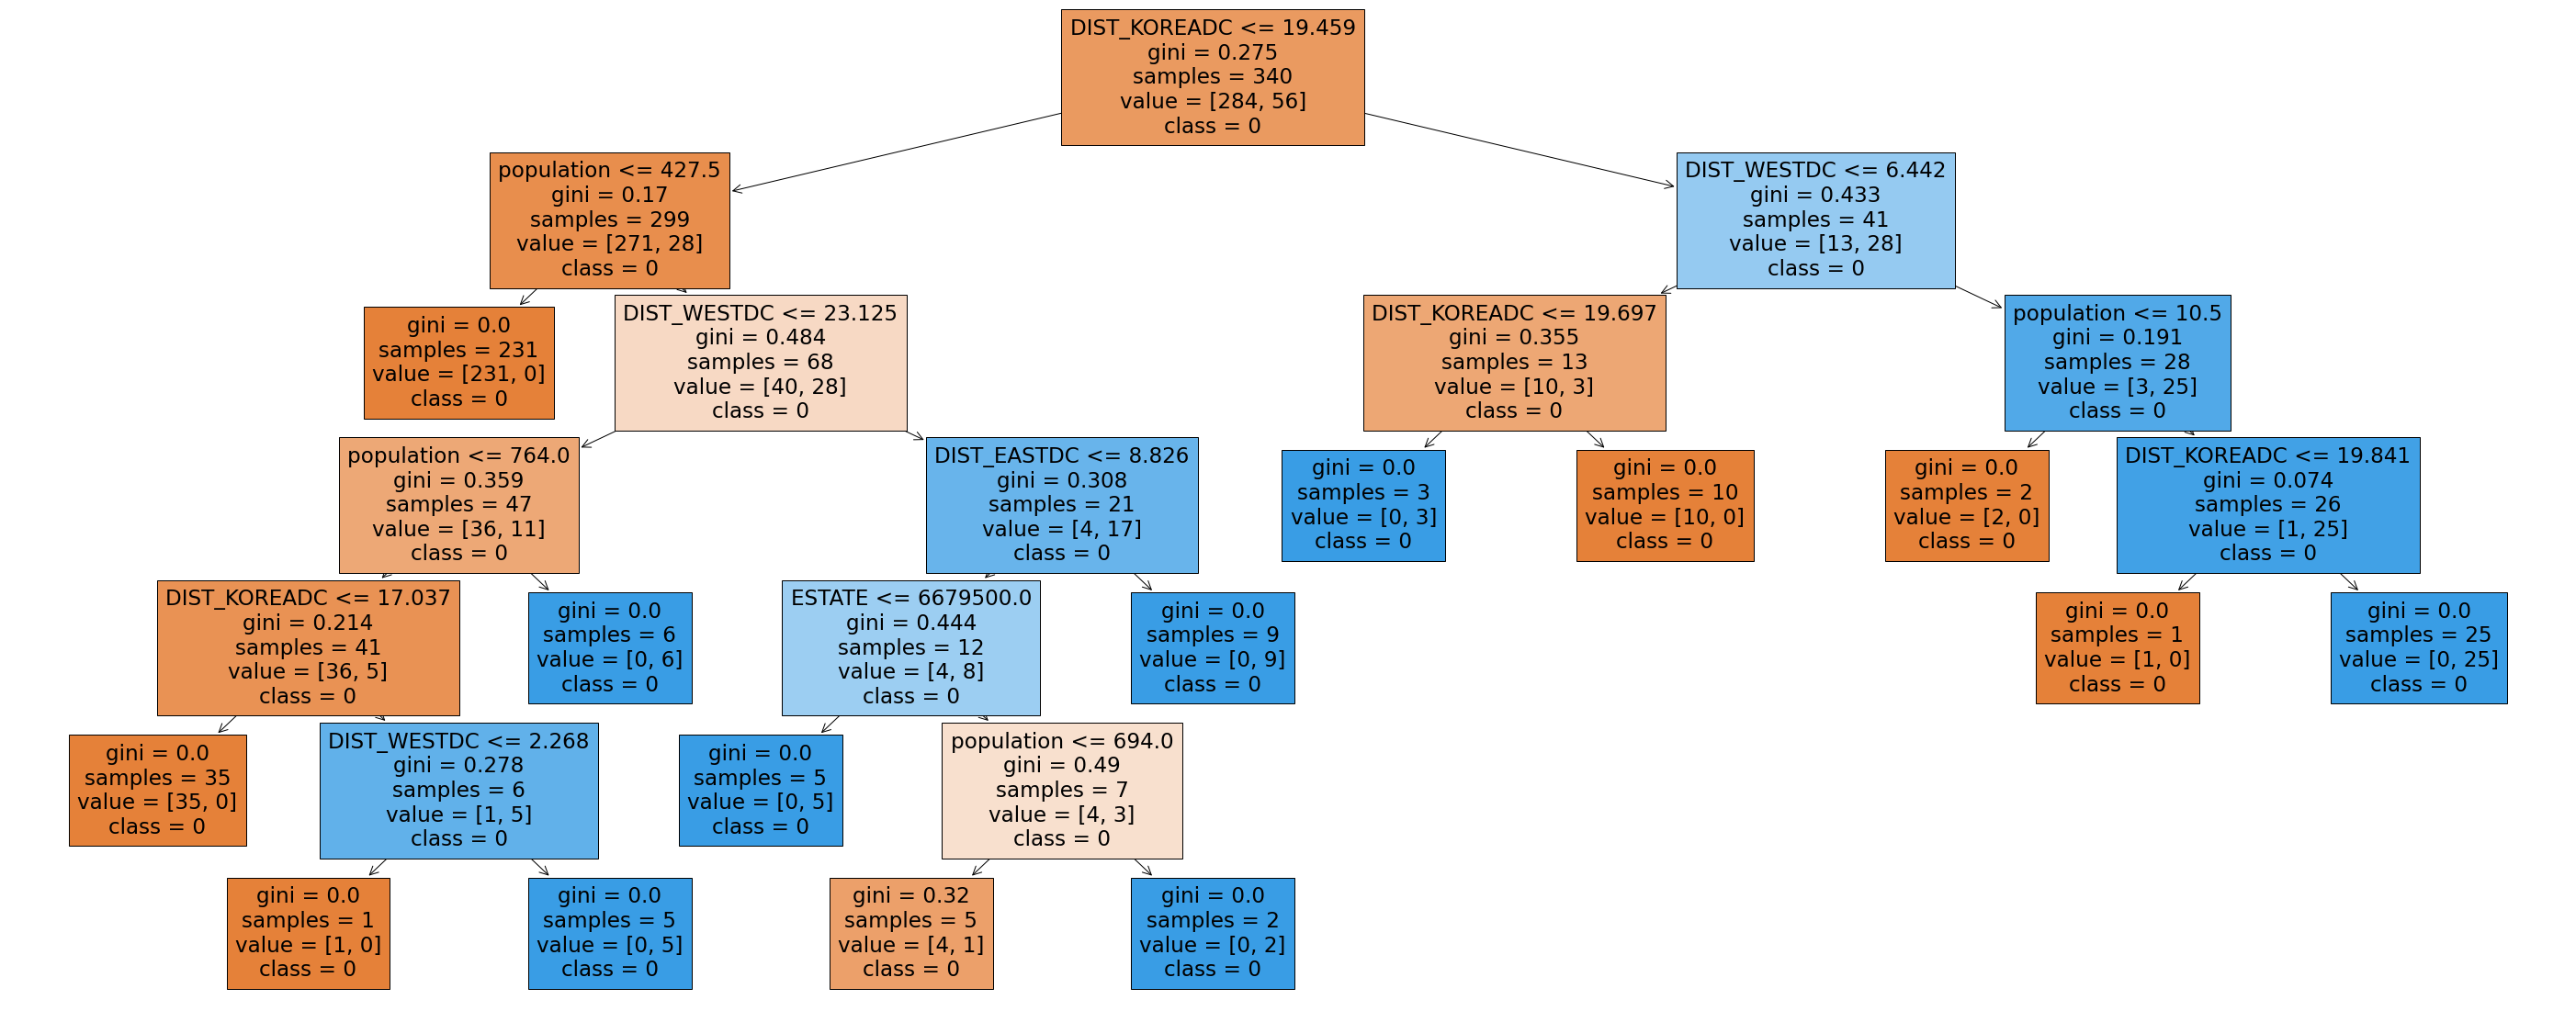

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(treeclf, 
                   feature_names=feature_cols,  
                   class_names=df_example.LOCATION.astype(str),
                   filled=True)

In [20]:
df_oil[df_oil.구 == '서대문구']

ValueError: cannot reindex on an axis with duplicate labels

In [33]:
df_temp[df_temp.구 =='서대문구']

,지번주소,구,동,법정코드,행정코드,지번주번지,지번부번지,위도,경도,address
119,서울 서대문구 대신동 16-7,서대문구,대신동,1141011300,1141058500,16,7,126.941569342334,37.5610155646644,16-7
120,서울 서대문구 창천동 512-3,서대문구,창천동,1141011600,1141058500,512,3,126.92684981646,37.5598695838504,512-3
121,서울 서대문구 연희동 194-32,서대문구,연희동,1141011700,1141061500,194,32,126.929929031318,37.5650243399688,194-32
122,서울 서대문구 연희동 220-55,서대문구,연희동,1141011700,1141061500,220,55,126.924941152249,37.5660708443759,220-55
123,서울 서대문구 연희동 446-4,서대문구,연희동,1141011700,1141061500,446,4,126.918985802478,37.5677454628917,446-4
124,서울 서대문구 연희동 76-11,서대문구,연희동,1141011700,1141061500,76,11,126.935927536368,37.5734779131892,76-11
125,서울 서대문구 연희동 89-7,서대문구,연희동,1141011700,1141061500,89,7,126.932458194132,37.5693077959774,89-7
126,서울 서대문구 홍은동 431,서대문구,홍은동,1141011800,1141068500,431,,126.936581879011,37.5807686609718,431-
127,서울 서대문구 홍제동 22-3,서대문구,홍제동,1141011100,1141065500,22,3,126.950101908476,37.5835529130439,22-3
128,서울 서대문구 홍제동 279-10,서대문구,홍제동,1141011100,1141064000,279,10,126.948477443752,37.5954419804145,279-10


In [ ]:
37.558494	126.934563126.92684981646	37.5598695838504	